### Boston 부동산 가격 회귀 예측
- scikit learn에서 제공하는 Boston dataset을 이용하여 부동산(주택) 가격을 예측한다.
- 회귀 예측을 이용한다.

<center><b>Dataset</b></center>

| column_name | description                                                         |
| ----------- | ------------------------------------------------------------------- |
| CRIM        | per capita crime rate by town                                       |
| ZN          | proportion of residential land zoned for lots over 25,000 sq.ft.    |
| INDUS       | proportion of non-retail business acres per town.                   |
| CHAS        | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| NOX         | nitric oxides concentration (parts per 10 million)                  |
| RM          | average number of rooms per dwelling                                |
| AGE         | proportion of owner-occupied units built prior to 1940              |
| DIS         | weighted distances to five Boston employment centres                |
| RAD         | index of accessibility to radial highways                           |
| TAX         | full-value property-tax rate per $10,000                            |
| PTRATIO     | pupil-teacher ratio by town                                         |
| B           | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town      |
| LSTAT       | % lower status of the population                                    |
| MEDV        | Median value of owner-occupied homes in $1000's                     |


<center><b>Import Libs</b></center>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.metrics import r2_score, mean_squared_error

<center><b>Load Data</b></center>

In [3]:
df = pd.read_csv('./data/boston.csv')

<center><b>Data Analysis</b></center>

In [4]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [5]:
df.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df.isna().sum() # check na or null value

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

#### correlation

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64


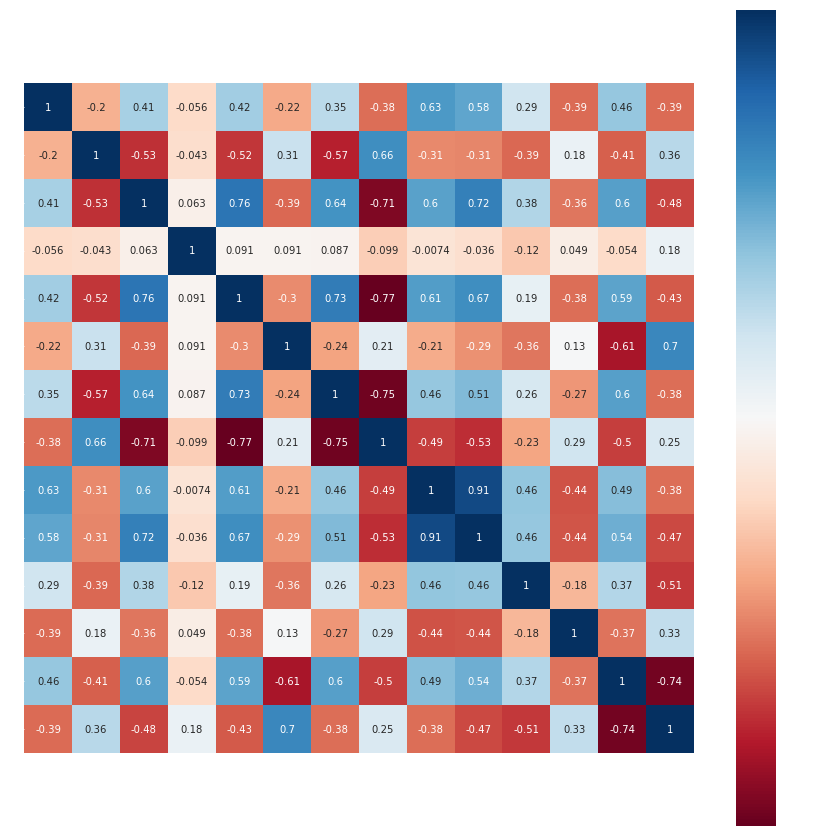

In [9]:
corr_matrix = df.corr()
corr_ordered = df.corr().loc[:'LSTAT','target'].abs().sort_values(ascending=False)

plt.figure(figsize=(15,15))

sns.set_style({
    'xtick.color': 'white',
    'ytick.color': 'white',
})
sns.heatmap(data=corr_matrix,cmap='RdBu',annot=True,square=True)
print(corr_ordered)
plt.show()

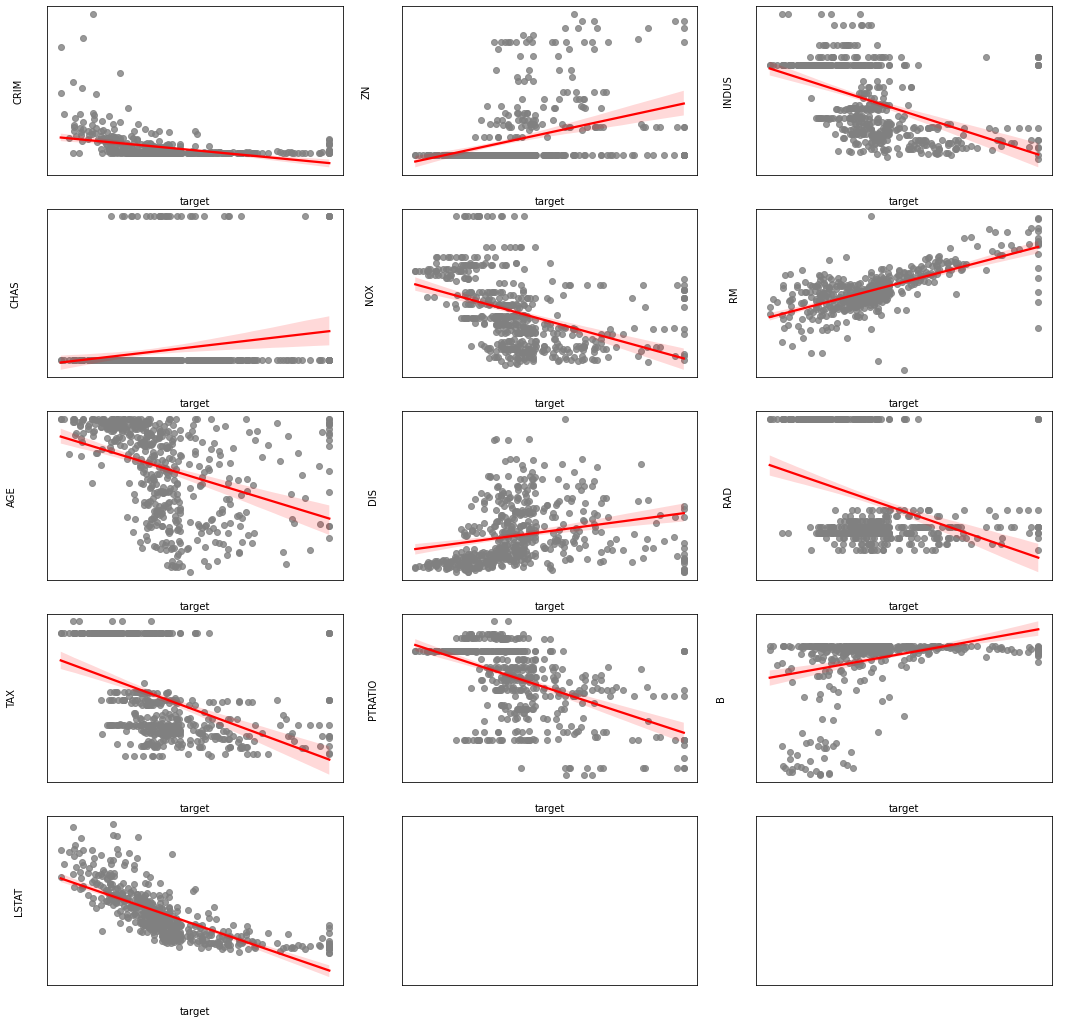

In [10]:
cols_except_target = df.columns[df.columns!='target']

fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(18,18))
axes = [*axes[0],*axes[1],*axes[2],*axes[3],*axes[4]]

for i,col in enumerate(cols_except_target):
     sns.regplot(data=df,x='target',y=col,ax=axes[i],scatter_kws={"color":'gray'},line_kws={'color':'red'})

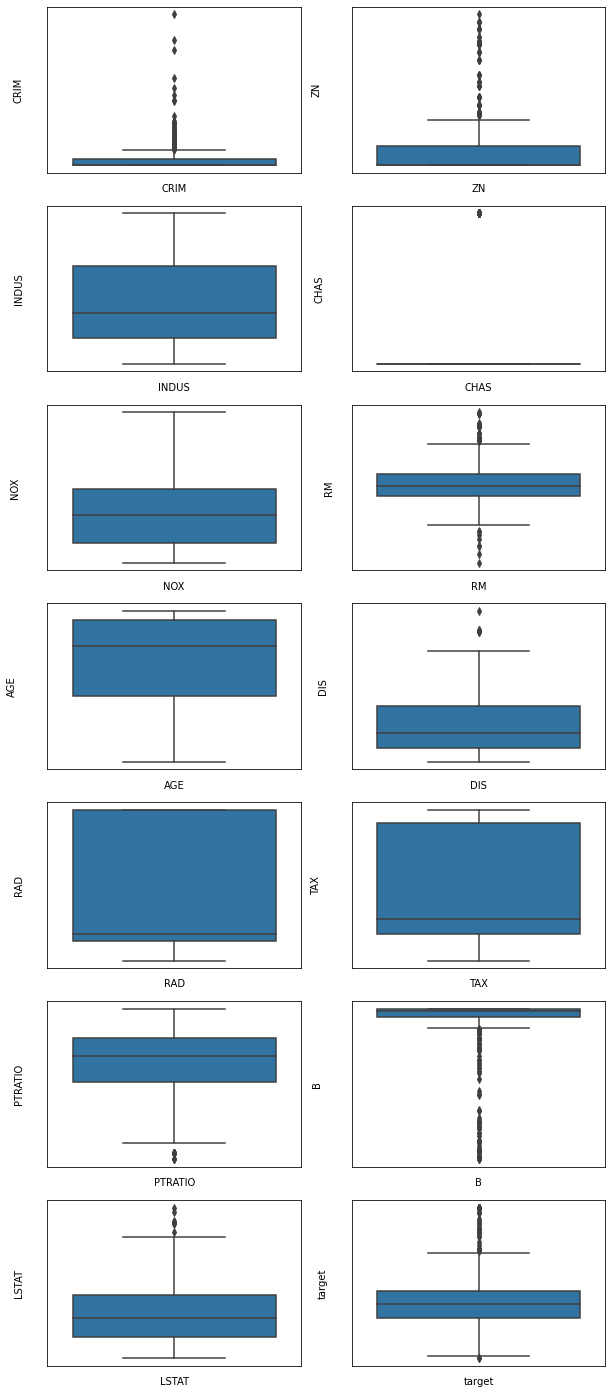

In [11]:
fig,axes = plt.subplots(ncols=2,nrows=7,figsize=(10,25))

spreaded = []
for i in axes:
    spreaded = [*spreaded,*i]
    
for i,c in enumerate(df.columns):
    a = sns.boxplot(data=df,y=c,ax=spreaded[i])
    a.set_xlabel(c)

<AxesSubplot:xlabel='target', ylabel='Count'>

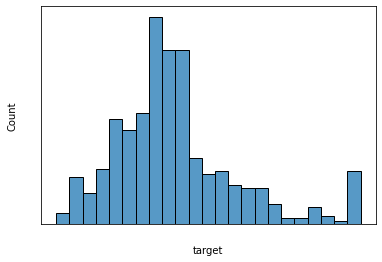

In [27]:
sns.histplot(data=df,x='target')

<center><b>Data Preprocessing</b></center>

In [ ]:
# Is there any need for preprocessing..?

<center><b>Data Preparation</b></center>

In [13]:
x = df.loc[:,df.columns!='target'].values
y = df.loc[:,'target'].values.reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


<center><b>Modeling Regression Model</b></center>

- used scoring func and RMSE for evaluation
    - r2_score
    - RMSE
    - cross validation score

- used Regression Algorithms(models)
    - Linear Regression
    - Polynomial Regression - 2nd degree
    - Ridge Regression
    - Lasso Regression
    - Support Vector Regression
    - Decision Tree Regression
    - Random Forest Regression

In [14]:
accuracies = []

### Linear Regression

In [15]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6986644490108912
R2_score (train):  0.7508856358979673
R2_score (test):  0.6687594935356289
RMSE:  4.928602182665359


### Polynomial Regression (2nd degree)

In [28]:
poly_reg = PolynomialFeatures()

X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

from sklearn.metrics import r2_score

cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))

print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.6986644490108912
R2_score (train):  0.9388251254402121
R2_score (test):  0.8065890295788442
RMSE:  3.766106499515472


### Ridge Regression

In [17]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8332439895016543
R2_score (train):  0.9337867753738609
R2_score (test):  0.8176352850610074
RMSE:  3.656978870793512


### Lasso Regression

In [18]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.8377498478361186
R2_score (train):  0.9341206418355112
R2_score (test):  0.8132898588216735
RMSE:  3.700292016450146


### Support Vector Regression

In [19]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)).reshape(-1,1))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)).reshape(-1,1))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))

print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.8162914709574028
R2_score (train):  0.8954163047944337
R2_score (test):  0.8226707804632897
RMSE:  3.6061367879622117


### Decision Tree Regression

In [20]:
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))

print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.6557051978018854
R2_score (train):  1.0
R2_score (test):  0.862408597996961
RMSE:  3.1764914668885362


### Random Forest Regression

In [21]:
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

cv_rf = cross_val_score(estimator = regressor_rf, X = X_scaled, y = y_train.ravel(), cv = 10)

y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))

print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8267957844474502
R2_score (train):  0.9785315412639791
R2_score (test):  0.8832028053810302
RMSE:  2.9266329021456667


In [22]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,4.928602,0.750886,0.668759,0.698664
1,Polynomial Regression (2nd),3.766106,0.938825,0.806589,0.698664
2,Ridge Regression,3.656979,0.933787,0.817635,0.833244
3,Lasso Regression,3.700292,0.934121,0.813290,0.837750
4,Support Vector Regression,3.606137,0.895416,0.822671,0.816291
5,Decision Tree Regression,3.176491,1.000000,0.862409,0.655705
6,Random Forest Regression,2.926633,0.978532,0.883203,0.826796


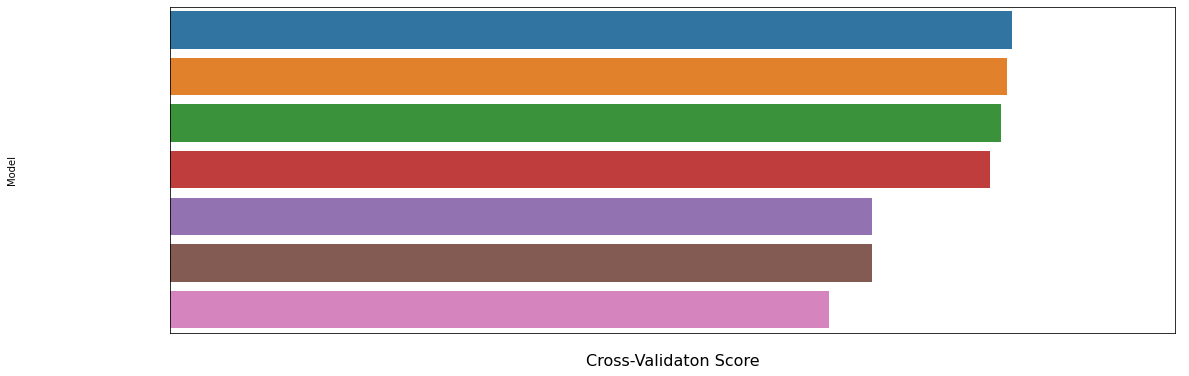

In [23]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

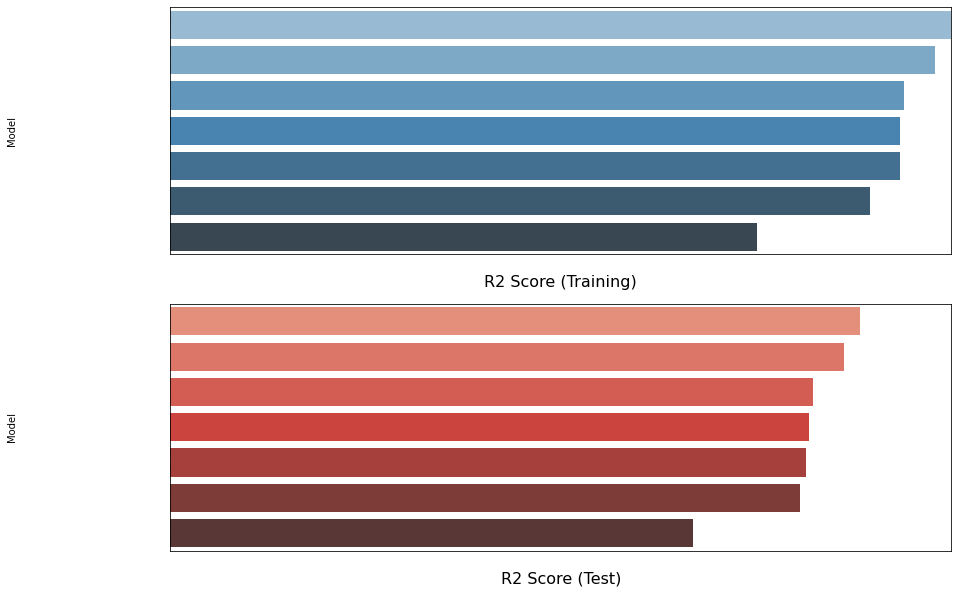

In [24]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

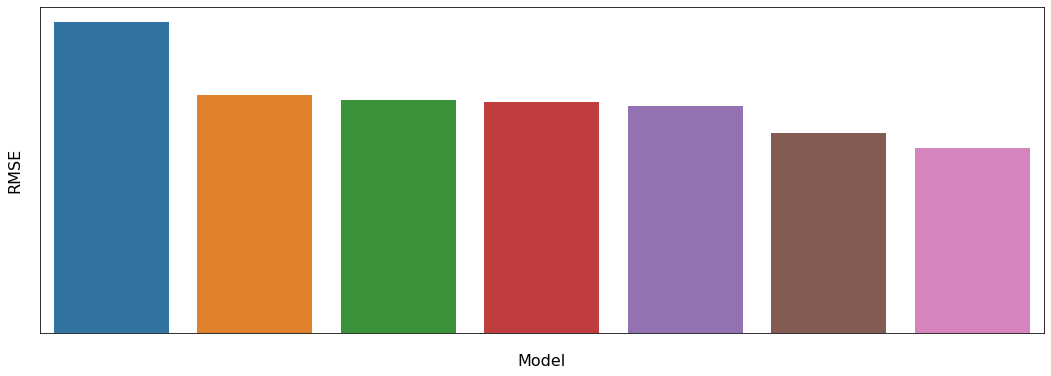

In [25]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()